In [473]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from PIL import Image
import pylab
import math
import os
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

### Stats:
    Total images: 8256
    Without annotations: 5050
    With annotations: 3206
    Contain tiny1: 1012
    Contain tiny2: 1387
    Contain tiny3: 1608
    Contain others: 1921

In [228]:
dataDir = "../dataset/tiny_set/erase_with_uncertain_dataset"
train_file = '../dataset/tiny_set/erase_with_uncertain_dataset/annotations/corner/task/tiny_set_train_sw640_sh512_all.json'

In [207]:
train_tiny3_and_others_file = '../dataset/tiny_set/erase_with_uncertain_dataset/annotations/corner/task/tiny_set_train_sw640_sh512_tiny3_and_others.json'

In [200]:
with open(train_file) as f:
    train = json.load(f)

In [201]:
annotations = train['annotations']
images = train['images']

In [202]:
len(images)

8256

Ignore tiny1, tiny2

In [203]:
for a in annotations:
    if a['size'] <= 12:
        a['ignore'] = True

Remove images that no longer have any annotations due to "ignore"

In [204]:
removed_images = []
remaining_images = []

for img in images:
    found_bbox = False
    for a in annotations:
        if a['image_id'] == img['id'] and not a['ignore']:
            found_bbox = True
            break
    if not found_bbox:
        removed_images.append(img)
    else:
        remaining_images.append(img)

In [205]:
len(removed_images)

5559

In [206]:
len(remaining_images)

2697

In [208]:
train['images'] = remaining_images

In [209]:
with open(train_tiny3_and_others_file, 'w') as f:
    json.dump(train, f)

In [453]:
with open(train_tiny3_and_others_file) as f:
    train_tiny3_and_others = json.load(f)

In [454]:
annotations = train_tiny3_and_others['annotations']
images = train_tiny3_and_others['images']

In [455]:
len(images)

2697

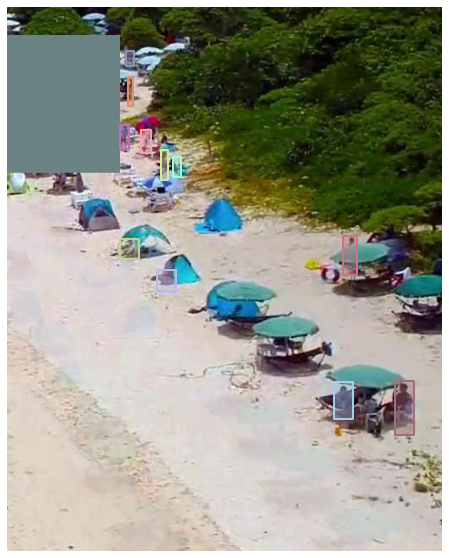

In [230]:
I = Image.open(f"{dataDir}/train/{img['file_name']}").convert('RGB')
I = I.crop(img['corner'])
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'])
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [456]:
def tinify(img, original_size):
    scale = original_size / 7.45
    resized_img = img.resize((math.ceil(img.width / scale), math.ceil(img.height / scale)), Image.ANTIALIAS)
    return resized_img

In [ ]:
def place_random(orig_img, file_name, corner, tiny_persons, existing_anns, max_objs=30):
    if os.path.exists(f"{dataDir}/train_augmented/{i['file_name']}"):
        orig_img = Image.open(f"{dataDir}/train_augmented/{i['file_name']}").convert('RGB')
    
    num_to_put = max(0, max_objs - len(existing_anns))
    
    if num_to_put == 0:
        return
    
    random.sample(population, k)


In [457]:
for i in images:
    annIds = coco.getAnnIds(imgIds=i['id'])
    
    original_img = Image.open(f"{dataDir}/train/{i['file_name']}").convert('RGB')
    cropped_img = original_img.crop(i['corner'])
    anns = coco.loadAnns(annIds)
    
    tinified_persons = []
    
    for a in anns:
        if a['ignore']:
            continue
        bbox = a['bbox']
        p = cropped_img.crop([bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1] + bbox[3]])
        tiny_p = tinify(p, a['size'])
        tinified_persons.append(tiny_p)
        
    place_random(original_img, i['file_name'], i['corner'], tinified_persons, anns)
    
    all_count.append(count)

In [458]:
len(big_persons), len(tinified_persons)

(28942, 28942)

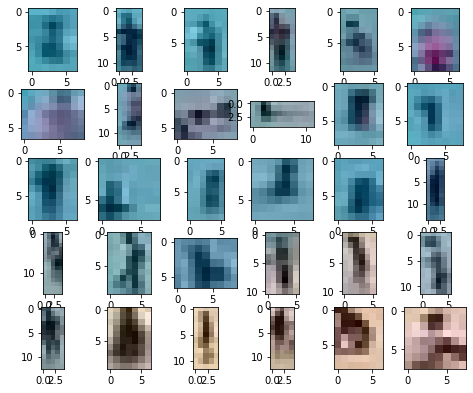

In [471]:
plt.figure(figsize=(8,8))
columns = 6
rows = 6
skip = 100
for i in range(30):
    plt.subplot(rows, columns, i+1)
    plt.imshow(tinified_persons[i+skip])
plt.show()

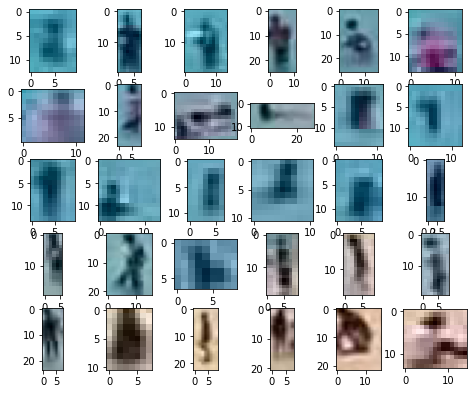

In [472]:
plt.figure(figsize=(8,8))
columns = 6
rows = 6
skip = 100
for i in range(30):
    plt.subplot(rows, columns, i+1)
    plt.imshow(big_persons[i+skip])
plt.show()

In [463]:
tinified_persons[0]